In [4]:
#Social_Network_Ads.csv

**Importing the libraries**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

**Importing the dataset**

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'].astype(str))

In [10]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


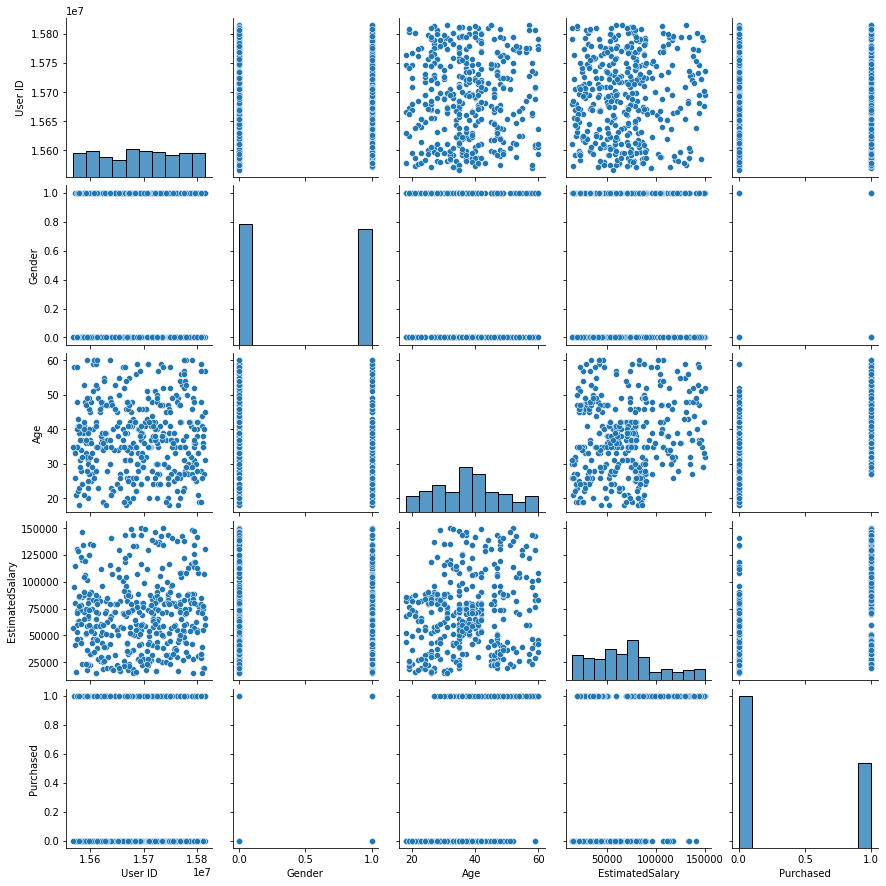

In [11]:
fig = sns.pairplot(df)

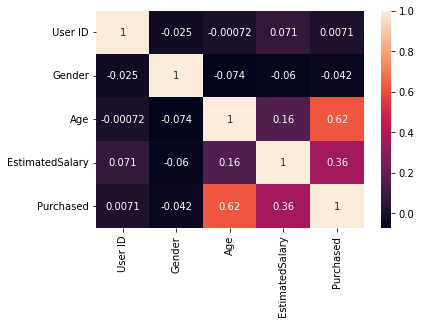

In [12]:
sns.heatmap(df.corr(), annot = True)

**Splitting the dataset into the Training set and Test set**

In [16]:
X=df.drop(['Purchased'],axis=1)
y=df.pop("Purchased")

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

**Feature Scaling**

In [18]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

**Fitting Random Forest to the Training set**

In [31]:
regressor = LogisticRegression()
regressor.fit(X_train,y_train)
pred = regressor.predict(X_test)

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100, criterion='entropy') 
rfcl = rfcl.fit(X_train, y_train)

In [54]:
rfcl.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

**Predicting the Test set results**

In [21]:
y_train = rfcl.predict(X_train)
y_test = rfcl.predict(X_test)

In [49]:
print(X_train.shape), print(X_test.shape), print(y_train.shape), print(y_test.shape)

(280, 4)
(120, 4)
(280,)
(120,)


(None, None, None, None)

In [22]:
X_test

array([[ 1.25862221e+00,  9.24286014e-01, -8.21426594e-01,
        -8.09789297e-01],
       [-3.97291999e-01, -1.08191619e+00, -6.33056859e-01,
         1.36233680e+00],
       [ 1.65876115e+00, -1.08191619e+00,  2.00411943e+00,
        -1.21525284e+00],
       [-1.46393776e+00,  9.24286014e-01,  1.20422081e-01,
         1.01479663e+00],
       [-9.90985113e-01,  9.24286014e-01,  8.73901020e-01,
        -8.09789297e-01],
       [ 7.80672119e-01, -1.08191619e+00,  8.73901020e-01,
         2.11534052e+00],
       [ 1.08824185e-01, -1.08191619e+00, -8.21426594e-01,
        -1.24421452e+00],
       [ 1.04151276e+00, -1.08191619e+00, -1.00979633e+00,
        -1.56279301e+00],
       [-1.41924718e+00,  9.24286014e-01,  8.73901020e-01,
        -1.38902292e+00],
       [-1.63965008e+00, -1.08191619e+00, -1.48072067e+00,
        -2.30555670e-01],
       [-1.69300384e+00, -1.08191619e+00, -1.57490553e+00,
        -1.59175469e+00],
       [ 1.62498142e-02, -1.08191619e+00,  1.81574970e+00,
      

In [24]:
X_train

array([[-0.25982658,  0.92428601,  0.40297668,  0.05906114],
       [-1.38118644, -1.08191619, -1.6690904 , -1.38902292],
       [ 0.79270034,  0.92428601,  0.77971615,  1.33337512],
       ...,
       [ 1.42747557,  0.92428601,  2.0983043 , -0.83875098],
       [-0.16382989, -1.08191619, -1.6690904 , -1.01252107],
       [ 1.20147383, -1.08191619,  1.8157497 ,  1.47818353]])

In [25]:
y_test

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [26]:
y_train

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1])

**Making the Confusion Matrix**

In [33]:
matrix = confusion_matrix(y_test,pred,labels = regressor.classes_)
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)

[[74  0]
 [11 35]]


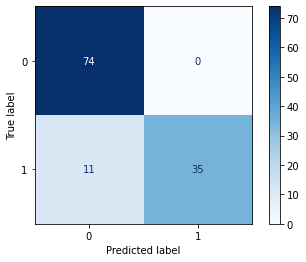

In [34]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=regressor.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

**Visualising the Training set results**

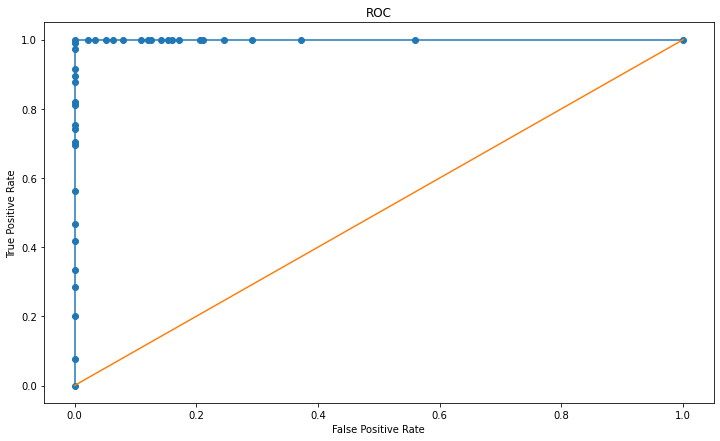

Area under Curve is 1.0


In [46]:
rf_fpr, rf_tpr,_=roc_curve(y_train,rfcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='o', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,rfcl.predict_proba(X_train)[:,1]))

**Visualising the Test set results**

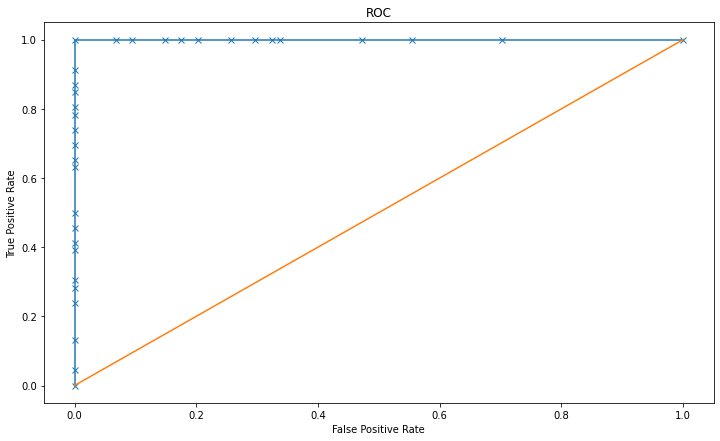

Area under Curve is 1.0


In [45]:
rf_fpr, rf_tpr,_=roc_curve(y_test,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,rfcl.predict_proba(X_test)[:,1]))

In [60]:
from sklearn import metrics
R=LogisticRegression()
R.fit(X_train,y_train)
pred=R.predict(X_test)
print(metrics.confusion_matrix(y_test,pred))
print(metrics.classification_report(y_test,pred))

[[74  0]
 [11 35]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        74
           1       1.00      0.76      0.86        46

    accuracy                           0.91       120
   macro avg       0.94      0.88      0.90       120
weighted avg       0.92      0.91      0.91       120



In [62]:
N=RandomForestClassifier(n_estimators=100)
N.fit(X_train,y_train)
prediction=N.predict(X_test)
print(metrics.confusion_matrix(y_test,prediction))
print(metrics.classification_report(y_test,prediction))

[[74  0]
 [ 1 45]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        74
           1       1.00      0.98      0.99        46

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

